In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [64]:
df = pd.read_csv('train_IxoE5JN.csv')
df.dropna(inplace=True)

In [65]:
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [66]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

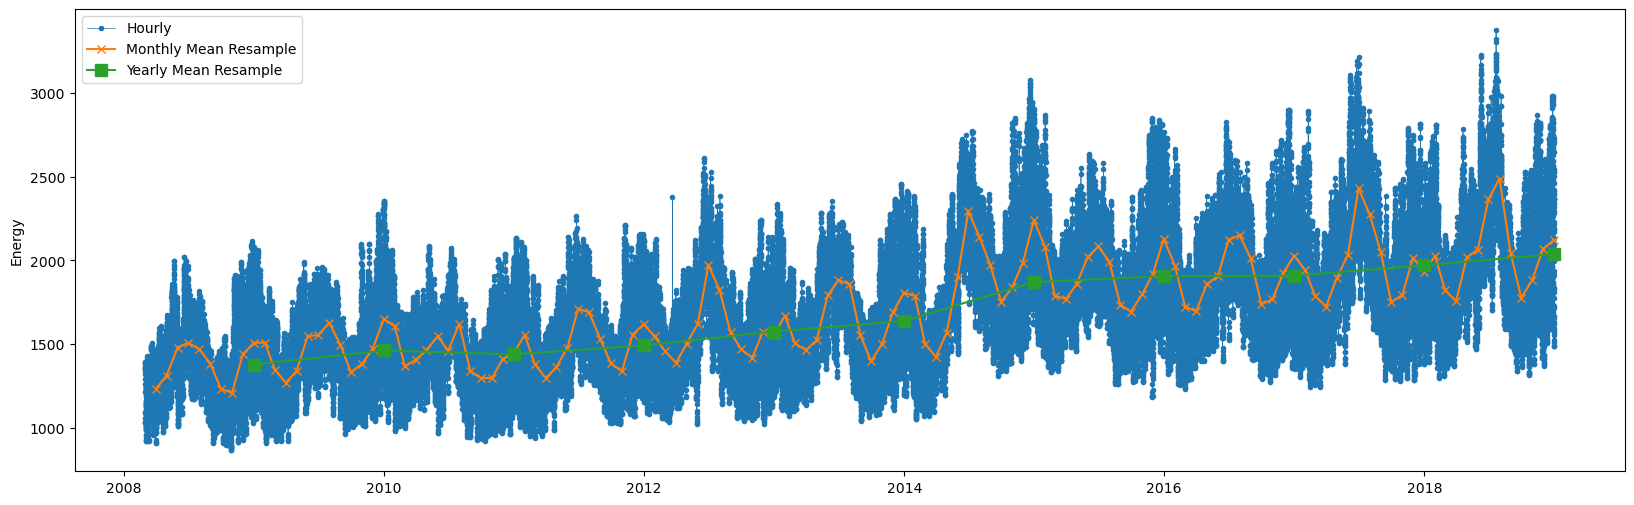

In [69]:
y = df['energy']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y, marker='.', linestyle='-', linewidth=0.5, label='Hourly')
#ax.plot(y.resample('D').mean(), marker='v', markersize=2, linestyle='-', label='Daily Mean Resample')
#ax.plot(y.resample('W').mean(), marker='o', markersize=4, linestyle='-', label='Weekly Mean Resample')
ax.plot(y.resample('M').mean(), marker='x', markersize=6, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(), marker='s', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Energy')
ax.legend();

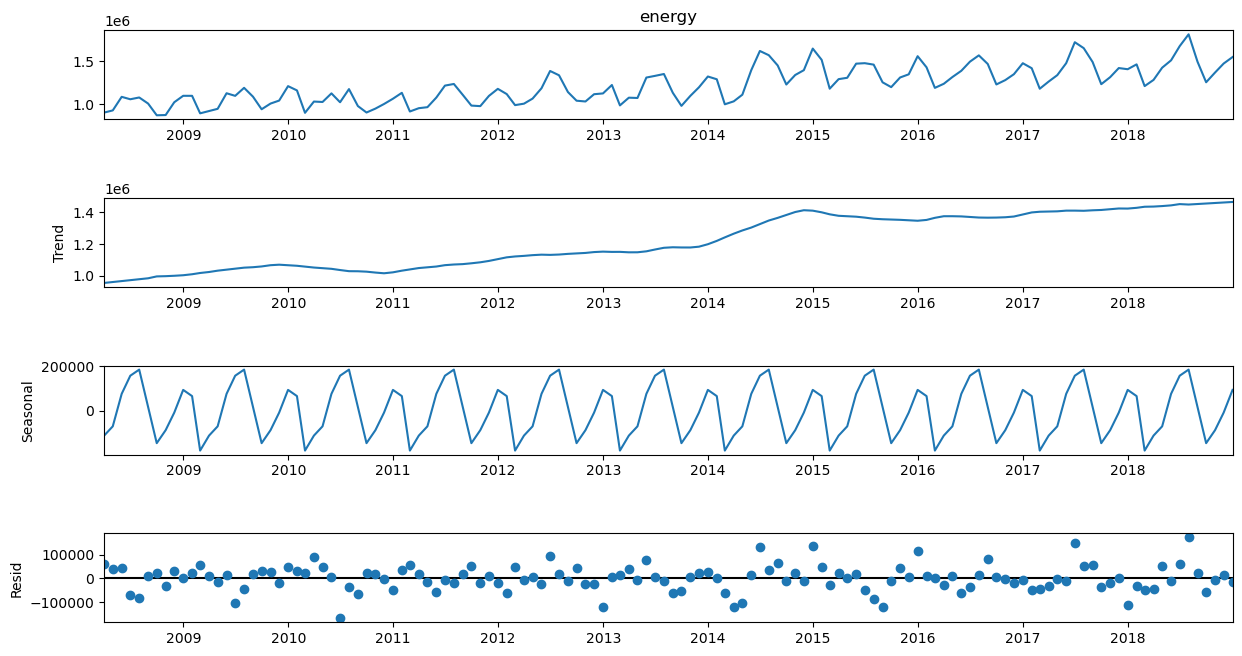

In [68]:
dff = df['2008-03-01':'2018-12-31'].resample('M').sum()
y = dff['energy']
def seasonal_decompose(y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
seasonal_decompose(y)

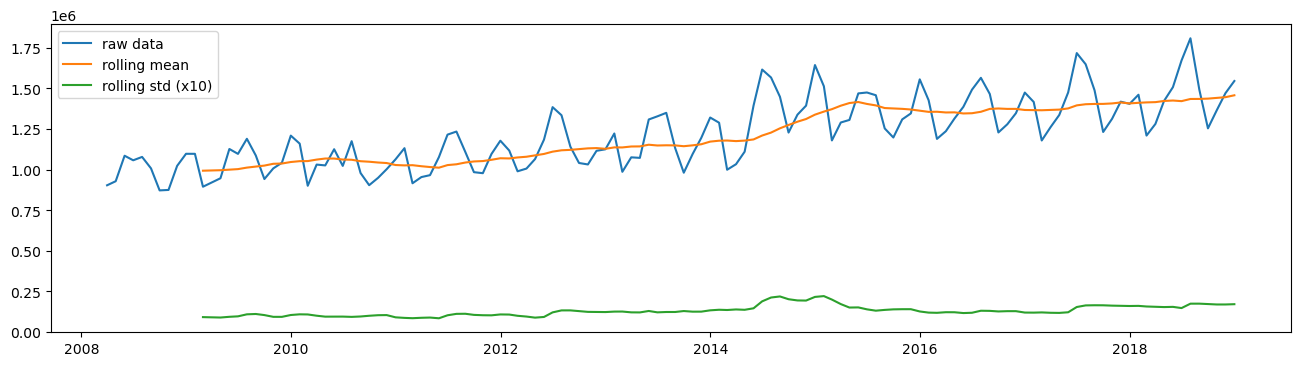

In [89]:
dff = df['2008-03-01':'2018-12-31'].resample('M').sum()
y = dff['energy']
def test_stationarity(timeseries, title):
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y, 'raw data')

In [100]:
dff = df['2008-03-01':'2018-12-31'].resample('W').sum()
y = dff['energy']
#y = df['energy']
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -1.813
P-value = 0.374
Critical values :
	1%: -3.4423614311926514 - The data is not stationary with 99% confidence
	5%: -2.866838307535097 - The data is not stationary with 95% confidence
	10%: -2.56959181953083 - The data is not stationary with 90% confidence


 > Is the de-trended data stationary ?
Test statistic = -10.536
P-value = 0.000
Critical values :
	1%: -3.442563336759378 - The data is  stationary with 99% confidence
	5%: -2.866927190004947 - The data is  stationary with 95% confidence
	10%: -2.5696391843672695 - The data is  stationary with 90% confidence


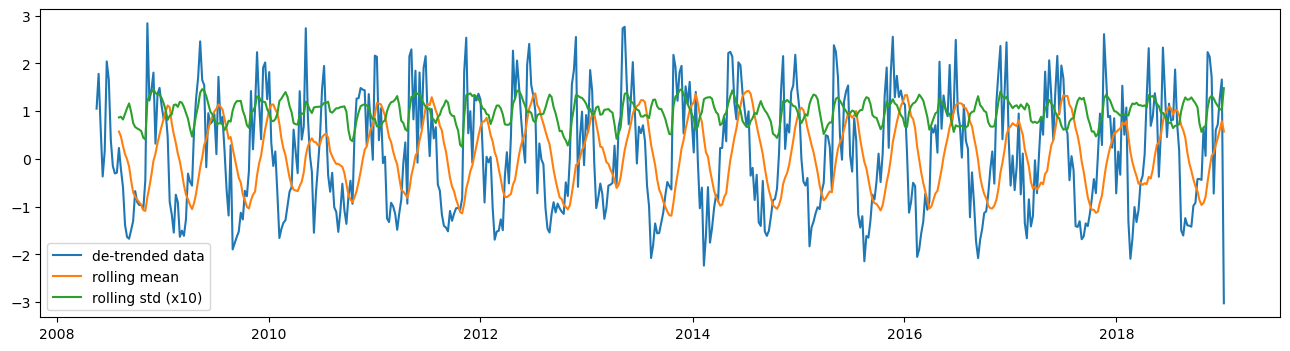

In [109]:
dff = df['2008-03-01':'2018-12-31'].resample('W').sum()
y = dff['energy']
# Detrending
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

 > Is the 12 lag differenced data stationary ?
Test statistic = -4.128
P-value = 0.001
Critical values :
	1%: -3.442563336759378 - The data is  stationary with 99% confidence
	5%: -2.866927190004947 - The data is  stationary with 95% confidence
	10%: -2.5696391843672695 - The data is  stationary with 90% confidence


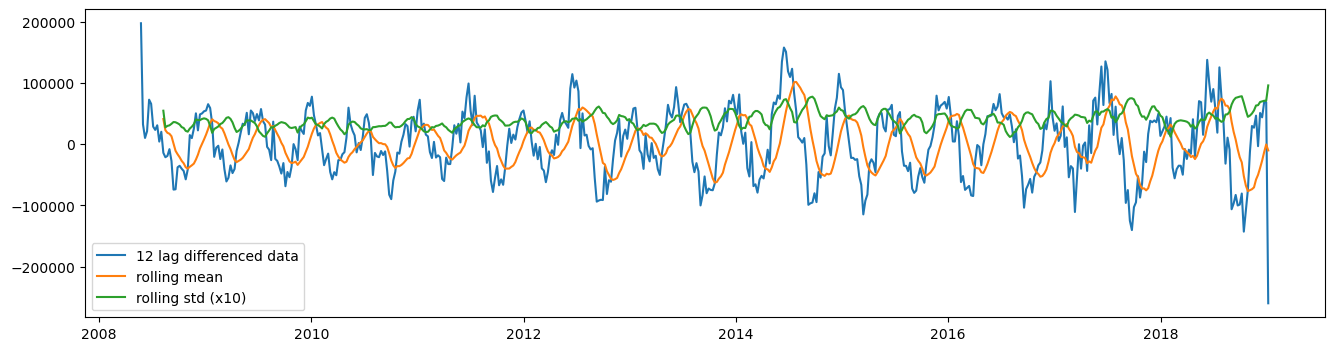

In [110]:
dff = df['2008-03-01':'2018-12-31'].resample('W').sum()
y = dff['energy']
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -14.237
P-value = 0.000
Critical values :
	1%: -3.4427251295084678 - The data is  stationary with 99% confidence
	5%: -2.8669984098683736 - The data is  stationary with 95% confidence
	10%: -2.5696771375119254 - The data is  stationary with 90% confidence


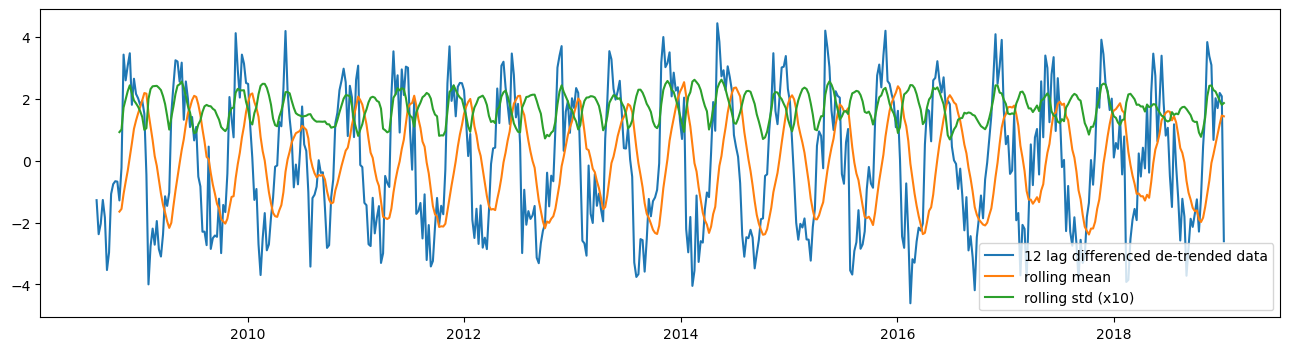

In [111]:
dff = df['2008-03-01':'2018-12-31'].resample('W').sum()
y = dff['energy']

# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')